# How Tweets reflect Formidable events

Vik Chawla
    

Qualitative:
We want to identify a set of events or trending topics that occured on different days. I will be using the data file VT_tweets_2019_geo.csv which contain the tweets that we will use. My hypothesis is that every day will have a trending topic that is related to a large event that occured that day. I will compute a Vector Space Model matrix using TFIDF to do this. Biases are inevatable as it is not controlled data, but variable based on peoples posts on those days. 




In [1]:
# Run this cell first.  Do NOT edit this cell.

import pandas
import numpy
import matplotlib
import matplotlib.pyplot
#%matplotlib notebook
#%matplotlib inline
data = pandas.read_csv('VT_tweets_2019_geo.csv') 
data.shape
data

,tweet,username,datetime,latitude,longitude,id
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664
...,...,...,...,...,...,...
81906,"RT @TeamCoachBuzz: From ‘90-‘92, I was a below...",SharifNabhan,2019-03-22 01:48:34,0.0,0.0,1108908295941693440
81907,"RT @TeamCoachBuzz: From ‘90-‘92, I was a below...",HoopBoys17,2019-03-22 01:48:41,0.0,0.0,1108908325394173952
81908,@NRVLiving @lmsedlak @timwitten @BlacksburgPub...,bedmison,2019-03-22 01:49:07,0.0,0.0,1108908432432791552
81909,Ya think? Naw. DT lied? https://t.co/2PgCYrOIdm,AFranklin64,2019-03-22 01:49:12,0.0,0.0,1108908453924405248


Quantitative: Data Cleaning
After the data was processed into a pandas dataframe, I had to clean the data by removing all frequent punctiation I saw in the ouput I create later on as well as make them lower case. 






In [17]:
#cleaning
import re
text = ' '.join(data.tweet)
text[:1000]
text = text.replace('.', '').replace(',','')
text = text.replace('!','').replace('.','')
text = text.replace(')','')
text = text.replace('(','')
text = text.lower()
text[:1000]
bag = text.split()
bag[:100]

data['bags'] = data.tweet.map(lambda t: 
               t.replace('!','').replace('.','').replace('(', '').replace(')', '').replace(',', '').replace(',', '').replace('?', '').replace('"', '').lower().split())




data['datetime'] = [x[:10] for x in data['datetime']]

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
data["tweet"] = data["tweet"].apply(lambda x: pattern.sub('', x))

#data['tweet'] = re.sub(r"http\S+", "", data["tweet"])


#data['tweet'] = re.sub(r'^https?:\/\/.*[\r\n]*', '', data['tweet'], flags=re.MULTILINE)
data2 = pandas.DataFrame(data= data)

data2

,tweet,username,datetime,latitude,longitude,id,bags,len
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11,0.0,0.0,1095061945810669568,"[calling, all, undergraduates, interested, in,...",11
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11,0.0,0.0,1095062439023005697,"[@ratbaby_, marisa, has, to, pay, for, her, ra...",17
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11,0.0,0.0,1095070250473848834,"[@djmouritzen, @sasquach_8, well, there's, onl...",20
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11,0.0,0.0,1095071630257242112,"[@therealdcunna, yes, to*, thank, you, david]",6
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11,0.0,0.0,1095072383470321664,"[i, turned, 245, yesterday, :/]",5
5,RT @VaTechJobs: Now Hiring - Radiologic Techno...,CougarTrainee,2019-02-11,0.0,0.0,1095079314201214977,"[rt, @vatechjobs:, now, hiring, -, radiologic,...",7
6,so proud of you dad!! ready for football seaso...,ViceSavannah,2019-02-11,0.0,0.0,1095080895399251968,"[so, proud, of, you, dad, ready, for, football...",10
7,RT @svyantek: I wonder if her wheelchair will ...,trisgilla,2019-02-11,0.0,0.0,1095082473438961666,"[rt, @svyantek:, i, wonder, if, her, wheelchai...",22
8,RT @DanielBreslau: Another measure of the colo...,STS_News,2019-02-11,0.0,0.0,1095087781062295552,"[rt, @danielbreslau:, another, measure, of, th...",20
9,"@PaulVWags Yeah, I lost it when my daughter re...",bhsfbradio,2019-02-11,0.0,0.0,1095088336874680320,"[@paulvwags, yeah, i, lost, it, when, my, daug...",18


These are visualization I created to give a better understanding of the length of points in the data and the data overall

AxesSubplot(0.125,0.125;0.775x0.755)


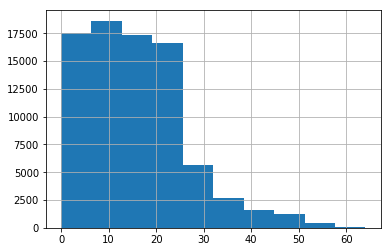

In [26]:
data['len'] = data.bags.map(lambda b: len(b))



%matplotlib inline



d = pandas.DataFrame({'df':range(1,101)})
d['inv'] = 100/d.df
d['log'] = numpy.log(d.inv)*20

%matplotlib inline

print(data.len.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


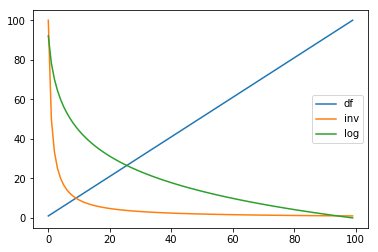

In [27]:
print(d.plot())

This is where I created the bags. m2 allowed me to see the value counts for each word giving a great insight into how often a word is truly used. This was done after grouping by datetime as that is the column we care about for our analysis.

In [19]:

g = data2.groupby('datetime')

g.size()

import itertools
u = g.bags.aggregate(lambda ListOfBags: list(itertools.chain.from_iterable(ListOfBags)))

m2 = u.iloc[0:1000].apply(lambda b: pandas.Series(b).value_counts())




m2







    

    
    
    


,of,the,rt,to,i,this,a,all,you,in,...,@teco_mutt,#is,khakis,@blacksburgpub,epistemology,@stickitin_hokie,“me,@ryneismean,whitebarrel,*nostalgia*
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-11,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-12,438.0,987.0,582.0,666.0,362.0,238.0,641.0,106.0,341.0,393.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-13,566.0,1358.0,820.0,885.0,633.0,375.0,991.0,109.0,461.0,597.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-14,589.0,1610.0,1322.0,1028.0,682.0,444.0,996.0,176.0,618.0,699.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-15,472.0,1209.0,1086.0,902.0,517.0,352.0,765.0,78.0,402.0,443.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-16,400.0,932.0,764.0,692.0,419.0,244.0,601.0,76.0,296.0,464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-17,431.0,1310.0,780.0,844.0,401.0,297.0,638.0,121.0,279.0,535.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-18,558.0,1321.0,826.0,1079.0,710.0,376.0,805.0,109.0,445.0,571.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-19,728.0,2131.0,1798.0,1571.0,630.0,486.0,1098.0,152.0,790.0,1017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is where I created the Vector Space Model matrix using TFIDF to prove or negate our hypothesis. After creating it I used idxmax to find the value required for each date.

In [20]:
# Compute IDF vector:
TF = m2
IDF = numpy.log( float(len(TF))/TF.count())

# compute TF-IDF matrix:
TFIDF = TF*IDF



TFIDF.idxmax(axis = 1)   



datetime
2019-02-11               @djmouritzen
2019-02-12                   grammys:
2019-02-13          #whytheycantwrite
2019-02-14                  valentine
2019-02-15             #valentinesday
2019-02-16                          🚙
2019-02-17                 4-straight
2019-02-18                  boundless
2019-02-19              unconditional
2019-02-20                    occlude
2019-02-21                 #agoutlook
2019-02-22           @pensnation_nick
2019-03-05                     trump…
2019-03-06                     trump…
2019-03-07                  toughness
2019-03-08    #internationalwomensday
2019-03-09                  2️⃣5️⃣0️⃣
2019-03-10                  robinson…
2019-03-11                @johnlewis:
2019-03-12                      otter
2019-03-13                    peaking
2019-03-14            @_handsomefella
2019-03-15                 @rightmuch
2019-03-16                     irish”
2019-03-17                 5️⃣:3️⃣0️⃣
2019-03-18           #back2back2back💃
201

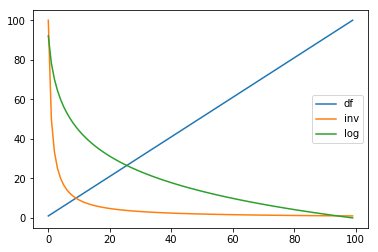

Qualitative:


This part came with several issues. It was mainly with removing different types of punctuation that were in it such as ) or , that were ruining the outputs. Also, the urls were in it which was taking out the wording that we needed, so I removed the urls. several re-runs and looking at the outputs, and then re-coding was required. Ultimately the outputs made alot of sense with the certain days. InternationWomensDay pointed to the the day it was supposed to be, #back2back2back was when Virginia Tech's basketball team got in the 3rd time to the march madness NCAA, grammy's was posted around the time the grammies occured and #valentines day was around the day of valentines day, irish was posted around St. Patricks day and so on. Therefore our hyothesis was correct as it defines the trending talking points of that period of time. There is still uncertainty as emojis were present whcih could have meant a lot of things that I am unsure of, however I believe they were helpful and meaningful enough to be left in. 



In [8]:
# scratch space
